In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
videos = pd.read_csv('/Youtube_Analysis/UScomments.csv',error_bad_lines = False)
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/vaibhav/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
#pip install textblob

In [4]:
from textblob import TextBlob

In [5]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

#polarity of 0 indicates neutral sentimental value

0.0

In [6]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
        

In [7]:
videos['polarity']=polarity

In [8]:
videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [9]:
#positive comments
positive_comments=videos[videos['polarity']==1]
positive_comments.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [10]:
#pip install wordcloud

In [11]:
from wordcloud import WordCloud,STOPWORDS  # stopwords to remove any unnecessary text like has,shall,etc.

In [12]:
total_comments=(' '.join(positive_comments['comment_text']))
len(total_comments)

846560

(-0.5, 999.5, 499.5, -0.5)

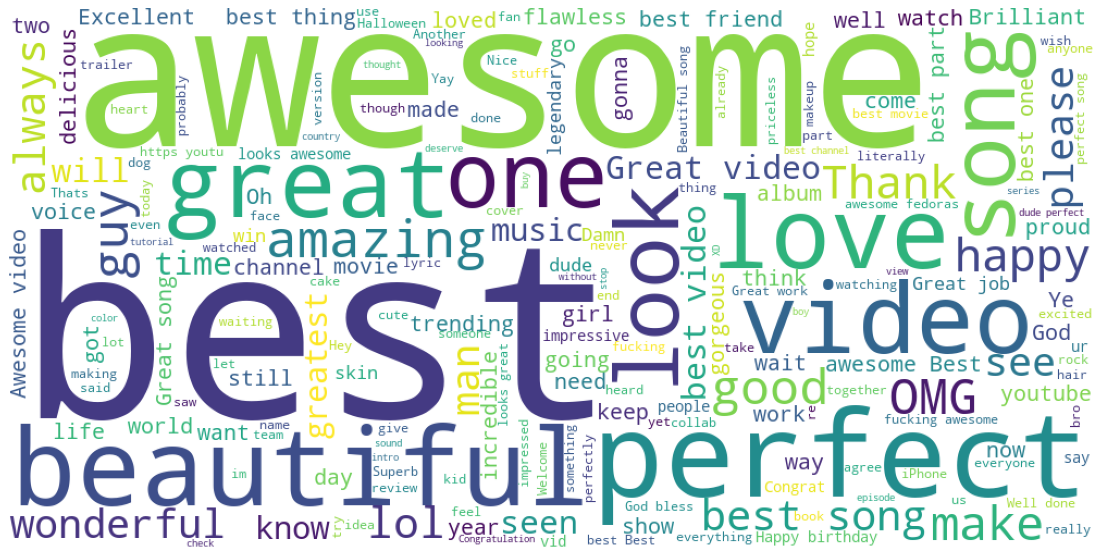

In [13]:
#positive comments wordcloud
wordcloud=WordCloud(background_color='white',width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [14]:
#negative comments
negative_comments=videos[videos['polarity']==-1]
negative_comments.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [15]:
#negative comments
total_comments=(' '.join(negative_comments['comment_text']))
len(total_comments)

190787

(-0.5, 999.5, 499.5, -0.5)

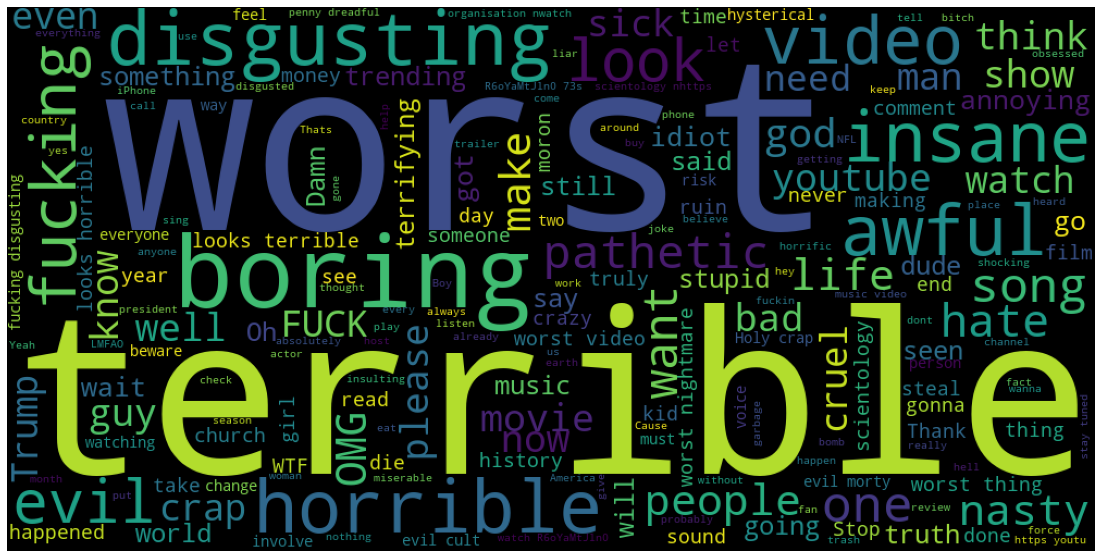

In [16]:
#negative comments
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [17]:
#tranding tags on youtube.
videos2=pd.read_csv('/Youtube_Analysis/USvideos.csv',error_bad_lines=False)
videos2.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [18]:
tags_complete=(' '.join(videos2['tags']))

In [19]:
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [20]:
#regular expresion library
import re

In [21]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [22]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [23]:
#removing extra space
tags=re.sub(' +',' ',tags)

In [24]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

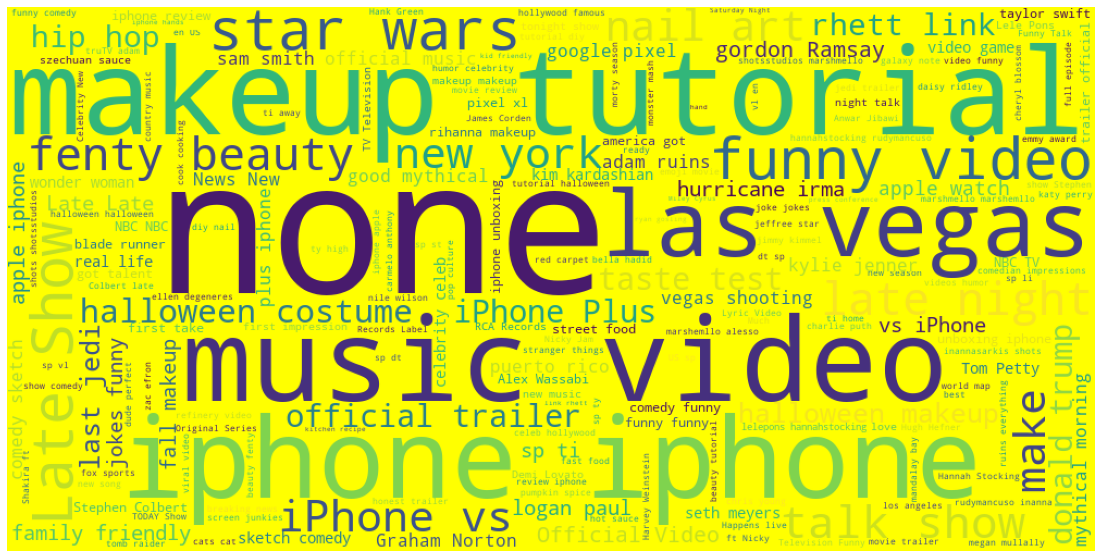

In [25]:
#wordcloud for tags of the videos
wordcloud=WordCloud(background_color='yellow',width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Likes vs Views')

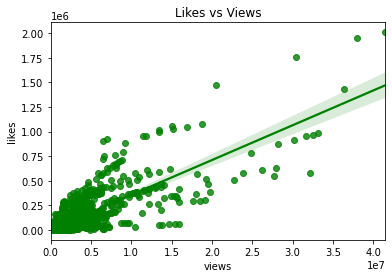

In [26]:
# likes,dislikes plotting

#likes vs views
sns.regplot(data=videos2,x='views',y='likes',color='green')
plt.title('Likes vs Views')

Text(0.5, 1.0, 'Dislikes vs Views')

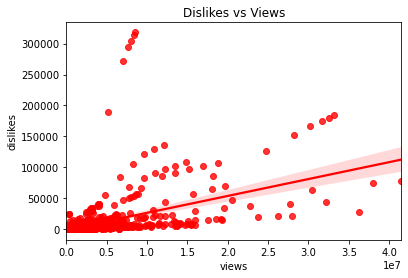

In [27]:
#dislikes vs views
sns.regplot(data=videos2,x='views',y='dislikes',color='red')
plt.title('Dislikes vs Views')

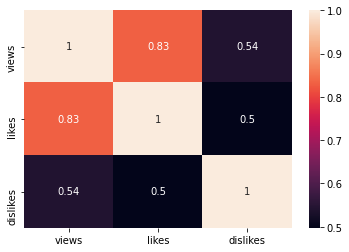

In [28]:
#heatmap for corellation of the data frame
df_corr=videos2[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

In [29]:
df_corr.head()

views   likes  dislikes
0  4394029  320053      5931
1  7860119  185853     26679
2  5845909  576597     39774
3  2642103   24975      4542
4  1168130   96666       568

In [30]:
# Emojis analysis

videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [31]:
#pip install emoji
import emoji

In [32]:
#checking for missing values

videos['comment_text'].dropna(inplace=True)

In [33]:
len(videos['comment_text'])

691375

In [34]:
videos['comment_text'][4]

'trending 😉'

In [35]:
#finding emoji from the text
comment = 'trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [36]:
str=''
for i in videos['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str+=ele

In [37]:
print(str) #prints all the emojis present

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊🌀

In [38]:
len(str) #total emojis

304745

In [39]:
#prints the count of all the emojis
res={i:str.count(i) for i in set(str)}
res

{'🌫': 4,
 '👦': 69,
 '🚑': 9,
 '😂': 36987,
 '👚': 9,
 '🌧': 11,
 '🏏': 5,
 '⭐': 198,
 '👹': 49,
 '🔳': 3,
 '🔑': 28,
 '♌': 7,
 '🌡': 7,
 '🌜': 6,
 '💀': 926,
 '🎼': 159,
 '🔪': 76,
 '🇧': 899,
 '🌑': 14,
 '⛏': 4,
 '⏩': 8,
 '🚋': 10,
 '🕟': 4,
 '😤': 378,
 '🔟': 2,
 '🈲': 5,
 '🔝': 143,
 '🍄': 19,
 '🔈': 7,
 '🎥': 76,
 '⤵': 7,
 '🇴': 158,
 '🔷': 103,
 '◻': 3,
 '🐺': 303,
 '⚰': 28,
 '💙': 2831,
 '📧': 7,
 '🙎': 12,
 '💰': 488,
 '↘': 8,
 '🔘': 6,
 '🔢': 5,
 '🈵': 6,
 '😚': 482,
 '🗃': 3,
 '🕠': 4,
 '👯': 49,
 '⬅': 15,
 '🎵': 284,
 '✡': 4,
 '🈁': 7,
 '😟': 122,
 '💧': 43,
 '💟': 508,
 '😾': 24,
 '✊': 289,
 '📚': 48,
 '💤': 31,
 '🎉': 684,
 '📥': 8,
 '🤬': 1,
 '🎱': 57,
 '😹': 201,
 '🥊': 15,
 '💕': 5147,
 '🦃': 13,
 '😐': 644,
 '🍦': 73,
 '🛁': 6,
 '🚓': 7,
 '🚰': 11,
 '🏦': 5,
 '😗': 354,
 '🏵': 8,
 '🎰': 6,
 '💿': 1031,
 '🆔': 4,
 '🐍': 1143,
 '♓': 7,
 '🕛': 7,
 '🐾': 103,
 '💗': 2144,
 '💨': 67,
 '🙅': 143,
 '🛠': 7,
 '👬': 32,
 '🍑': 127,
 '☯': 16,
 '💖': 5359,
 '😄': 1496,
 '😊': 3596,
 '🕡': 4,
 '♉': 6,
 '🎳': 21,
 '🈯': 7,
 '♎': 18,
 '🔤': 5,
 '🍃': 59,
 '🤛': 33,

In [40]:
#sorting in ascending order
res={k:v for k,v in sorted(res.items(),key=lambda item:item[1])}
res

{'🤬': 1,
 '🤭': 1,
 '🧢': 1,
 '🤪': 1,
 '🤟': 1,
 '♾': 1,
 '🔟': 2,
 '🛢': 2,
 '🖨': 2,
 '⚙': 2,
 '⏸': 2,
 '⚒': 2,
 '☣': 2,
 '🤨': 2,
 '🖲': 2,
 '⏯': 2,
 '⏹': 2,
 '🎏': 2,
 '🏷': 2,
 '☦': 2,
 '⏭': 2,
 '⚗': 2,
 '⏺': 2,
 '🗄': 2,
 '🔳': 3,
 '◻': 3,
 '🗃': 3,
 '📴': 3,
 '🤺': 3,
 '🛩': 3,
 '💹': 3,
 '🖇': 3,
 '☂': 3,
 '⏲': 3,
 '🛣': 3,
 '⚛': 3,
 '⏮': 3,
 '🗒': 3,
 '◼': 3,
 '🏮': 3,
 '🏑': 3,
 '🕹': 3,
 '🗳': 3,
 '🕉': 3,
 '⛰': 3,
 '🏎': 3,
 '🎎': 3,
 '🗞': 3,
 '🛶': 3,
 '🚏': 3,
 '🚕': 3,
 '◽': 3,
 '🕳': 3,
 '🗓': 3,
 '🖌': 3,
 '➗': 3,
 '🧐': 3,
 '🗜': 3,
 '🗂': 3,
 '🔖': 3,
 '☸': 3,
 '🌫': 4,
 '⛏': 4,
 '🕟': 4,
 '🕠': 4,
 '✡': 4,
 '🆔': 4,
 '🕡': 4,
 '🈺': 4,
 '🕜': 4,
 '🎛': 4,
 '🦏': 4,
 '➿': 4,
 '🈚': 4,
 '⏱': 4,
 '🏘': 4,
 '🎽': 4,
 '🕚': 4,
 '🕑': 4,
 '🛃': 4,
 '⌨': 4,
 '⛓': 4,
 '🏧': 4,
 '↖': 4,
 '🌥': 4,
 '🏔': 4,
 '🛵': 4,
 '🚟': 4,
 '🕗': 4,
 '🉑': 4,
 '🚄': 4,
 '🦍': 4,
 '🛤': 4,
 '🚎': 4,
 '🔃': 4,
 '🚉': 4,
 '❔': 4,
 '🎐': 4,
 '🕦': 4,
 '🕍': 4,
 '🈸': 4,
 '🥅': 4,
 '🚚': 4,
 '🏤': 4,
 '🛬': 4,
 '🛂': 4,
 '🚃': 4,
 '🕙': 4,
 '⏬': 4,
 '⏪': 4,
 '🈷': 4,
 

In [41]:
keys=[*res.keys()]
values=[*res.values()]

In [42]:
keys[0] #extracting particular emoji

'🤬'

In [43]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

chars    num
0      🤣   2279
1      🏼   2549
2      😢   2672
3      💙   2831
4      👌   3112
5      😬   3381
6      💜   3429
7      🏻   3438
8      😊   3596
9      ♥   4909
10     💕   5147
11     💖   5359
12     👍   5476
13     😘   5545
14     👏   5719
15     😭   8398
16     🔥   8694
17     ❤  31119
18     😍  33453
19     😂  36987

In [44]:
#pip install plotly

In [45]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [46]:
trace=go.Bar(x = df['chars'],
             y = df['num']
            )
iplot([trace])                      